In [4]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from pre_processing import *
from algorithms import *
from spectrum_gen import *
from data_gen import *
from analysis import *
from datasets import *
from evaluation import *
#cr_filtering()
#cr_read_norm()1dasdas
import h5py
import scanpy as sc
from sklearn.metrics import adjusted_rand_score
n_obs=1000 #number of observations per timepoint


In [5]:
adata = read_liver_data_2(n_obs=n_obs) #read data
adata = sort_data_crit(adata=copy.deepcopy(adata.copy()),crit='ZT',crit_list=['0','6','12','18']) #sort the data according to the timepoints
adata

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jonathankarin/.conda/envs/spctral_jan/l

View of AnnData object with n_obs × n_vars = 4000 × 14812
    obs: 'ZT', 'layer', 'batch'

In [6]:


#standard pre-processing
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata, n_top_genes=7000)
orig_adata = copy.deepcopy(adata.copy())



/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


         Falling back to preprocessing with `sc.pp.pca` and default params.


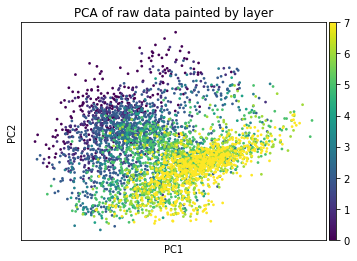

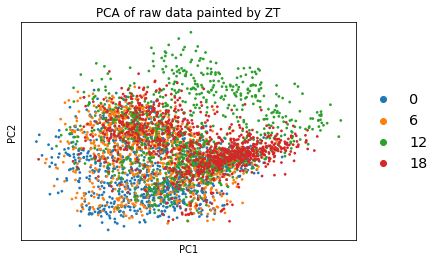

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


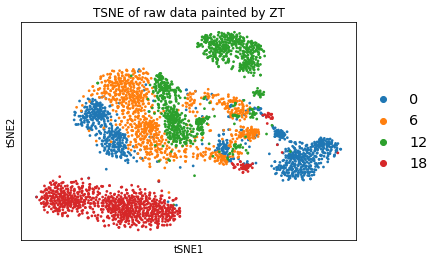

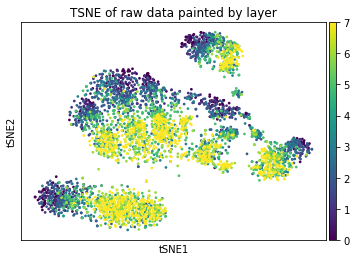

In [7]:
plots_adata(adata , title="raw data")



In [176]:
split_data_zt = orig_adata.copy()
split_data_zt = sort_data_crit(adata=copy.deepcopy(split_data_zt.copy()),crit='ZT',crit_list=['0','6','12','18']) #sort the data according to the timepoints


In [177]:
V_ZT = np.zeros((4000,2))
V_ZT[:1000,0]=1
V_ZT[1000:3000,1]=1
V_ZT[3000:,0]=1
F = enhance_general_topology(split_data_zt.X,V_ZT, iterNum=100, regu=10)
split_data_zt.X = split_data_zt.X * F


Iteration number: 
1
function value: 
2433854.5130991773
Iteration number: 
26
function value: 
1560374.7704223543
Iteration number: 
51
function value: 
1519521.7761741513
Iteration number: 
76
function value: 
1515623.955197426


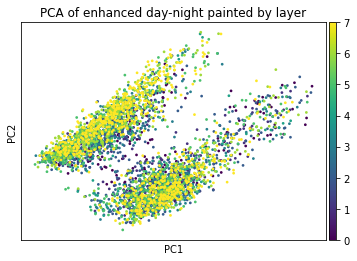

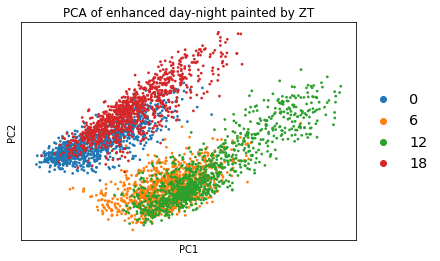

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


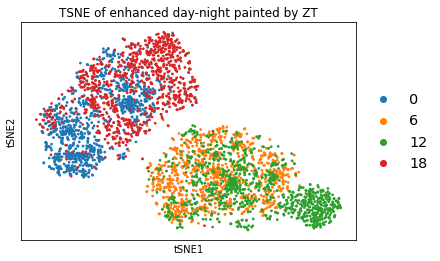

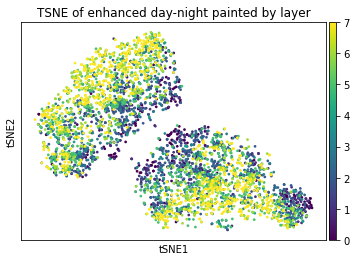

In [183]:
plots_adata(split_data_zt , title="enhanced day-night")

1111


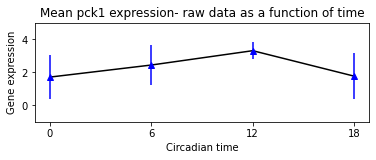

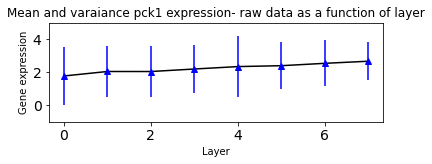

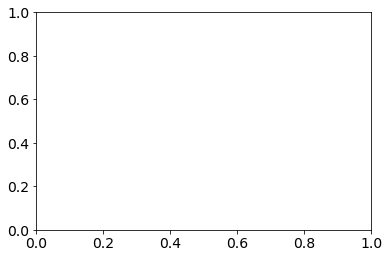

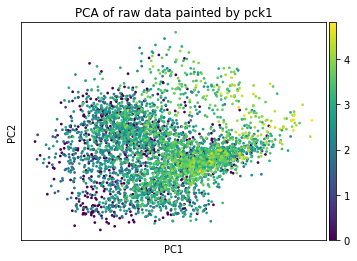

In [181]:
plt_mean_gene_liver_var(orig_adata,'pck1', up_lim=5 , down_lim=-1, title='raw data')

1111


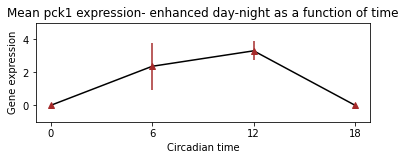

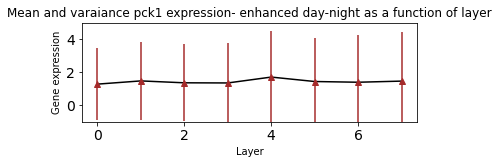

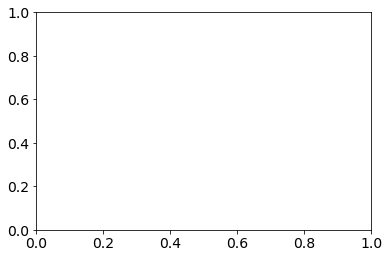

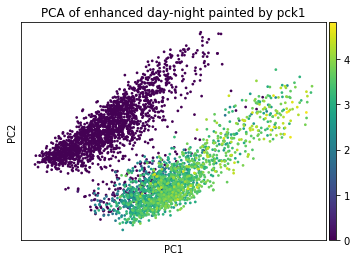

In [187]:
plt_mean_gene_liver_var(split_data_zt,'pck1', up_lim=5 , down_lim=-1, title='enhanced day-night' , color='brown')
